## **Question 3: Regression Analysis**

### **Dataset Name:** `user_behavior_dataset.csv`
### **Dataset Link:** `https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset`

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import os
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from threadpoolctl import threadpool_limits
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

### 1.Data Preprocessing

In [133]:

file_path = 'user_behavior_dataset.csv'
# Load the dataset
data = pd.read_csv('user_behavior_dataset.csv')

# Inspect the first few rows
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


### 2. Data Cleaning and Feature Selection


In [136]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

# Summary statistics
data.describe()

Missing Values:
 User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


### 3. Feature Scaling (if needed)

In [139]:
# Doğrusal Regresyon Modeli
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Test verisinde tahmin yapma
y_pred_lr = lr_model.predict(X_test)

# Performans Değerlendirmesi
print("\nDoğrusal Regresyon Performansı:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"R² Skoru: {r2_score(y_test, y_pred_lr)}")


Doğrusal Regresyon Performansı:
RMSE: 187.81707452975874
MAE: 157.6647818147578
R² Skoru: 0.9431559247340016


### 4. Linear Regression

In [142]:
from sklearn.linear_model import LinearRegression

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation Metrics
print("Linear Regression Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"R² Score: {r2_score(y_test, y_pred_lr)}")


Linear Regression Performance:
RMSE: 187.81707452975874
MAE: 157.6647818147578
R² Score: 0.9431559247340016


### 5. Ridge & Lasso Regression

In [145]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("\nRidge Regression Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge)}")
print(f"R² Score: {r2_score(y_test, y_pred_ridge)}")

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

print("\nLasso Regression Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lasso)}")
print(f"R² Score: {r2_score(y_test, y_pred_lasso)}")



Ridge Regression Performance:
RMSE: 187.90203826483827
MAE: 157.77089970181893
R² Score: 0.9431044834326393

Lasso Regression Performance:
RMSE: 187.82913717719927
MAE: 157.67723312166893
R² Score: 0.9431486228200501


### 6. Random Forest Regression

In [148]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
print("\nRandom Forest Regression Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"R² Score: {r2_score(y_test, y_pred_rf)}")



Random Forest Regression Performance:
RMSE: 175.22678342446886
MAE: 147.82935714285713
R² Score: 0.9505215552252047


### 7. Model Comparison & Analysis

               Model        RMSE  R² Score
0  Linear Regression  187.817075  0.943156
1   Ridge Regression  187.902038  0.943104
2   Lasso Regression  187.829137  0.943149
3      Random Forest  175.226783  0.950522


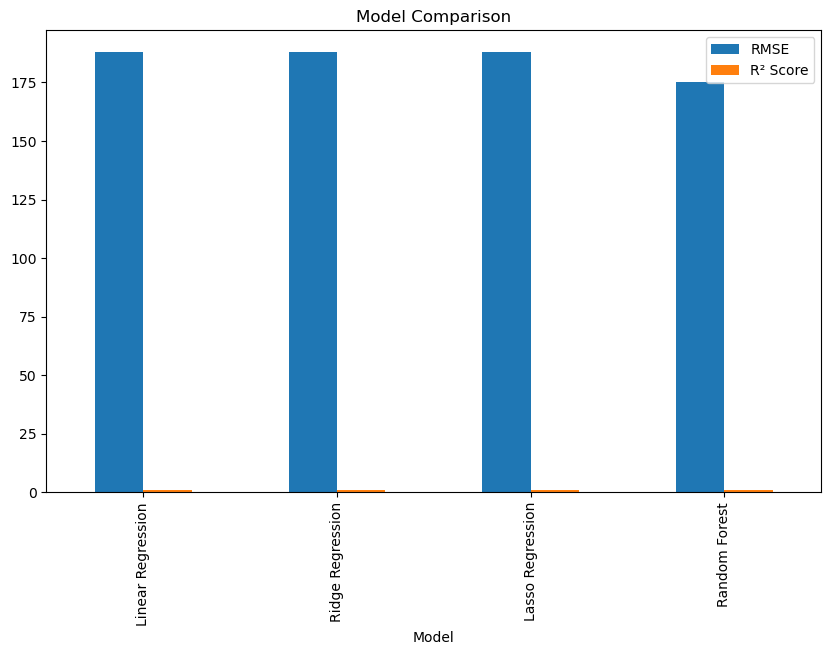

In [151]:
# Compare performances visually
metrics = {
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression", "Random Forest"],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    ],
    "R² Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_rf),
    ]
}

# Convert to DataFrame
results_df = pd.DataFrame(metrics)
print(results_df)

# Visualization
results_df.set_index("Model")[["RMSE", "R² Score"]].plot(kind="bar", figsize=(10, 6), title="Model Comparison")
plt.show()
